<a href="https://colab.research.google.com/github/Sloba98/Laundry-Image-Classification/blob/vgg16-base_model_branch/vgg16_upgraded_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

In [84]:
from torchvision import models, transforms
from torchvision.models import VGG16_Weights
from torchvision.datasets import ImageFolder

In [85]:
import matplotlib.pyplot as plt
from PIL import Image

In [88]:
# Define a function to create a VGG16 model with a custom classifier
def create_vgg16_model(num_classes=1000):
    # Load pre-trained VGG16 model
    vgg16 = models.vgg16(weights=VGG16_Weights.IMAGENET1K_V1)

    # Freeze the parameters in the feature extractor
    for param in vgg16.parameters():
        param.requires_grad = False

    vgg16.classifier = nn.Sequential(
        nn.Linear(512 * 7 * 7, 4096),
        nn.ReLU(inplace=True),
        nn.Dropout(0.5),
        nn.Linear(4096, 4096),
        nn.ReLU(inplace=True),
        nn.Dropout(0.5),
        nn.Linear(4096, num_classes)
    )
    return vgg16


In [90]:
num_classes = 10

vgg16_model = create_vgg16_model(num_classes)

criterion = nn.CrossEntropyLoss()

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
vgg16_model.to(device)

learning_rate = 0.001
optimizer = optim.Adam(vgg16_model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

print(vgg16_model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [91]:
def calculate_accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    correct = (preds == labels).sum().item()
    total = labels.size(0)
    accuracy = correct / total
    return accuracy

In [92]:
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = ImageFolder(root='drive/MyDrive/inputs/train/', transform=train_transforms)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)

In [93]:
train_losses = []
train_accuracy = []

num_epochs = 32
for epoch in range(num_epochs):

    vgg16_model.train()

    running_loss = 0.0
    running_accuracy = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = vgg16_model(inputs)

        loss = criterion(outputs, labels)
        loss.backward()

        optimizer.step()

        accuracy = calculate_accuracy(outputs, labels)

        running_loss += loss.item()
        running_accuracy += accuracy

    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = running_accuracy / len(train_loader)

    train_losses.append(loss)
    train_accuracy.append(accuracy)

    print(f'Epoch {epoch+1}: [ Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f} ]')

Epoch 1: [ Loss: 1.6594, Accuracy: 0.6549 ]
Epoch 2: [ Loss: 0.5832, Accuracy: 0.8358 ]
Epoch 3: [ Loss: 0.4675, Accuracy: 0.8783 ]
Epoch 4: [ Loss: 0.5454, Accuracy: 0.8902 ]
Epoch 5: [ Loss: 0.5837, Accuracy: 0.8964 ]
Epoch 6: [ Loss: 0.5322, Accuracy: 0.9083 ]
Epoch 7: [ Loss: 0.7239, Accuracy: 0.9009 ]
Epoch 8: [ Loss: 0.7040, Accuracy: 0.9141 ]
Epoch 9: [ Loss: 0.5590, Accuracy: 0.9312 ]
Epoch 10: [ Loss: 0.6345, Accuracy: 0.9312 ]
Epoch 11: [ Loss: 0.7659, Accuracy: 0.9282 ]
Epoch 12: [ Loss: 0.6713, Accuracy: 0.9436 ]
Epoch 13: [ Loss: 0.8660, Accuracy: 0.9399 ]
Epoch 14: [ Loss: 0.7755, Accuracy: 0.9365 ]
Epoch 15: [ Loss: 0.9400, Accuracy: 0.9403 ]
Epoch 16: [ Loss: 0.8490, Accuracy: 0.9498 ]
Epoch 17: [ Loss: 0.8738, Accuracy: 0.9515 ]
Epoch 18: [ Loss: 0.6495, Accuracy: 0.9654 ]
Epoch 19: [ Loss: 0.7557, Accuracy: 0.9577 ]
Epoch 20: [ Loss: 0.7917, Accuracy: 0.9561 ]
Epoch 21: [ Loss: 0.7327, Accuracy: 0.9664 ]
Epoch 22: [ Loss: 1.0843, Accuracy: 0.9632 ]
Epoch 23: [ Loss: 0

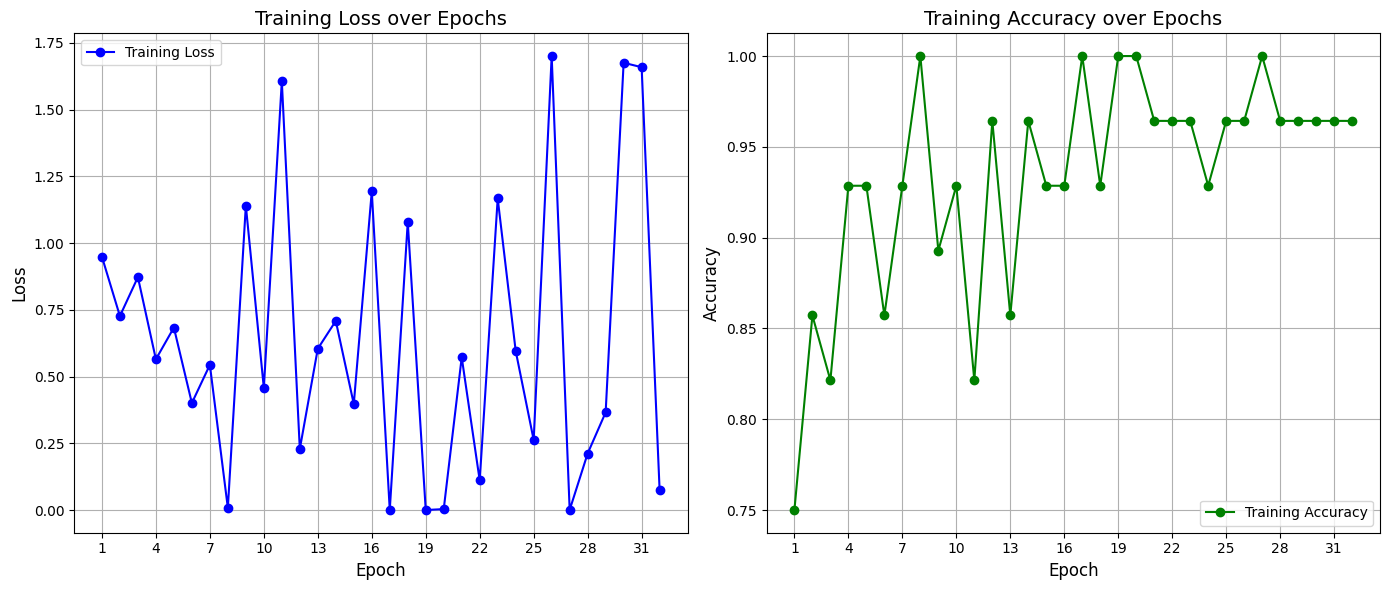

Epoch  Loss       Accuracy  
------------------------------
1      0.9493     0.7500    
2      0.7266     0.8571    
3      0.8725     0.8214    
4      0.5648     0.9286    
5      0.6836     0.9286    
6      0.4008     0.8571    
7      0.5438     0.9286    
8      0.0079     1.0000    
9      1.1406     0.8929    
10     0.4575     0.9286    
11     1.6066     0.8214    
12     0.2286     0.9643    
13     0.6044     0.8571    
14     0.7086     0.9643    
15     0.3972     0.9286    
16     1.1934     0.9286    
17     0.0000     1.0000    
18     1.0789     0.9286    
19     0.0000     1.0000    
20     0.0035     1.0000    
21     0.5721     0.9643    
22     0.1108     0.9643    
23     1.1672     0.9643    
24     0.5960     0.9286    
25     0.2624     0.9643    
26     1.7009     0.9643    
27     0.0003     1.0000    
28     0.2118     0.9643    
29     0.3657     0.9643    
30     1.6757     0.9643    
31     1.6591     0.9643    
32     0.0738     0.9643    


In [94]:
# Convert tensor values to floats for plotting
train_losses = [loss.cpu().item() if isinstance(loss, torch.Tensor) else loss for loss in train_losses]
train_accuracy = [acc.cpu().item() if isinstance(acc, torch.Tensor) else acc for acc in train_accuracy]

# Plotting function
def plot_training_metrics(train_losses, train_accuracy, num_epochs):
    plt.figure(figsize=(14, 6))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(range(1, num_epochs + 1), train_losses, marker='o', color='b', linestyle='-', label='Training Loss')
    plt.title('Training Loss over Epochs', fontsize=14)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.xticks(range(1, num_epochs + 1, max(1, num_epochs // 10)))  # Adjust for better tick marks
    plt.grid(True)
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(range(1, num_epochs + 1), train_accuracy, marker='o', color='g', linestyle='-', label='Training Accuracy')
    plt.title('Training Accuracy over Epochs', fontsize=14)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.xticks(range(1, num_epochs + 1, max(1, num_epochs // 10)))
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

# Display loss and accuracy for each epoch
def display_epoch_metrics(train_losses, train_accuracy):
    print(f"{'Epoch':<6} {'Loss':<10} {'Accuracy':<10}")
    print('-' * 30)
    for epoch in range(len(train_losses)):
        print(f"{epoch + 1:<6} {train_losses[epoch]:<10.4f} {train_accuracy[epoch]:<10.4f}")

# Plot the metrics
plot_training_metrics(train_losses, train_accuracy, num_epochs)

# Print the metrics in tabular form
display_epoch_metrics(train_losses, train_accuracy)

In [72]:
def get_clothing_item(number):
    clothing_items = {
        0: 'dress',
        1: 'hat',
        2: 'longsleeve',
        3: 'outwear',
        4: 'pants',
        5: 'shirt',
        6: 'shoes',
        7: 'shorts',
        8: 'skirt',
        9: 't-shirt'
    }

    return clothing_items.get(number, 'Unknown')

Predicted class: dress


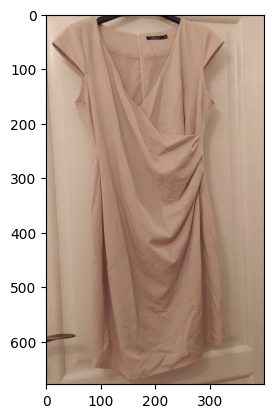

In [97]:
def predict_image(model, image_path, transform, device):
    model.eval()

    image = Image.open(image_path).convert('RGB')
    plt.imshow(image)
    image = transform(image)
    image = image.unsqueeze(0)

    image = image.to(device)

    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs, 1)

    return predicted.item()

# Predict the class of a new image
image_path = 'drive/MyDrive/inputs/test/dress/35f157d0-53e4-4496-b087-da4ad63edd47.jpg'


predicted_class_index = predict_image(vgg16_model, image_path, train_transforms, device)
print(f'Predicted class: {get_clothing_item(predicted_class_index)}')

In [98]:
test_dataset = ImageFolder(root='drive/MyDrive/inputs/test', transform=train_transforms)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Function to evaluate the model on the test set
def evaluate_model(model, test_loader):

    model.eval()  # Set model to evaluation mode

    test_loss = 0.0
    test_accuracy = 0.0

    criterion = nn.CrossEntropyLoss()  # Reuse the same loss function

    with torch.no_grad():  # No gradients needed during testing
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            accuracy = calculate_accuracy(outputs, labels)
            test_loss += loss.item()
            test_accuracy += accuracy

    # Calculate average loss and accuracy
    test_loss /= len(test_loader)
    test_accuracy /= len(test_loader)

    print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

# Call the evaluate function after training is done
evaluate_model(vgg16_model, test_loader)

Test Loss: 5.8660, Test Accuracy: 0.8646
